In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

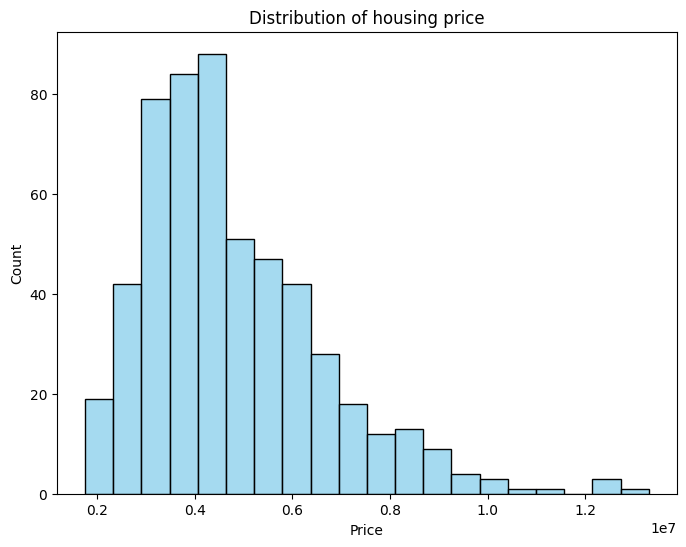

In [5]:
import seaborn as sns
data_cleaned = df.dropna(subset=['price'])

# Membuat histogram usia penumpang
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['price'], bins=20, color='skyblue')
plt.title('Distribution of housing price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [7]:
features = ['area', 'bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
x = df[features]
y = df['price']
x.shape, y.shape

((545, 12), (545,))

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=70)
y_test.shape

(137,)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [20]:
score = lr.score(x_test,y_test)
print('akurasi model regresi linear = ',score)

akurasi model regresi linear =  0.7195088774198822


In [12]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [13]:
import numpy as np
input_data = np.array([[8000,3,2,2,1,0,0,1,1,2,0,1]])

prediction = lr.predict(input_data)
print('Prediksi harga rumah : ',prediction)

Prediksi harga rumah :  [7917521.71274871]


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
import pickle

filename = 'housing_prediction.sav'
pickle.dump(lr,open(filename,'wb'))